In [ ]:
correlation matrix


MAR bnate hue correlation matrix

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
heart_df = pd.read_csv("heart.csv")

In [3]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [25]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
heart_df['Oldpeak'].max()

6.2

In [15]:
heart_df['FastingBS'].unique()

array([0, 1])

In [17]:
heart_df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

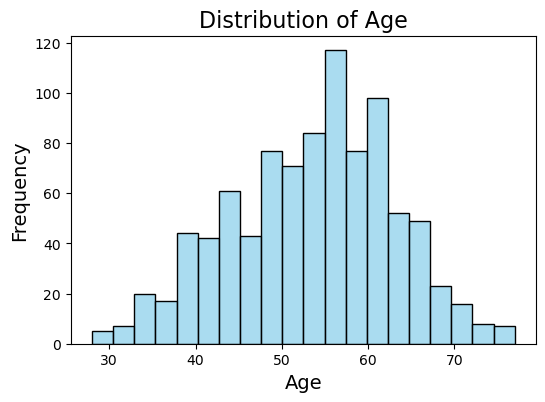

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(heart_df['Age'], kde=False, color='skyblue', bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [65]:
heart_df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

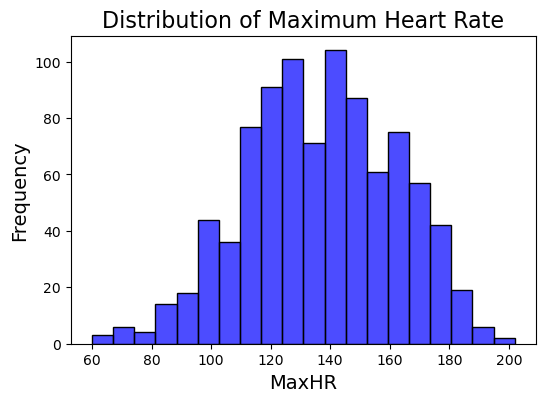

In [47]:
plt.figure(figsize=(6, 4))
sns.histplot(heart_df['MaxHR'], kde=False, color='blue', bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Maximum Heart Rate', fontsize=16)
plt.xlabel('MaxHR', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

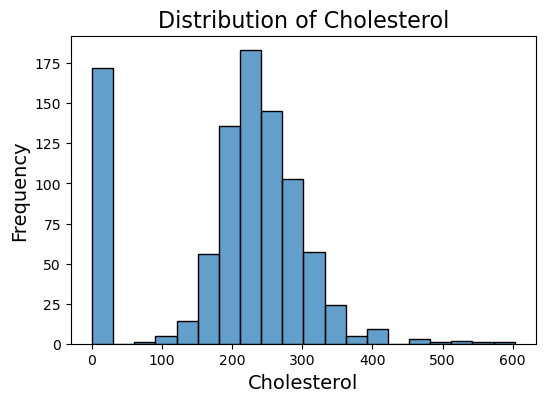

In [49]:
plt.figure(figsize=(6, 4))
sns.histplot(heart_df['Cholesterol'], kde=False, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Cholesterol', fontsize=16)
plt.xlabel('Cholesterol', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

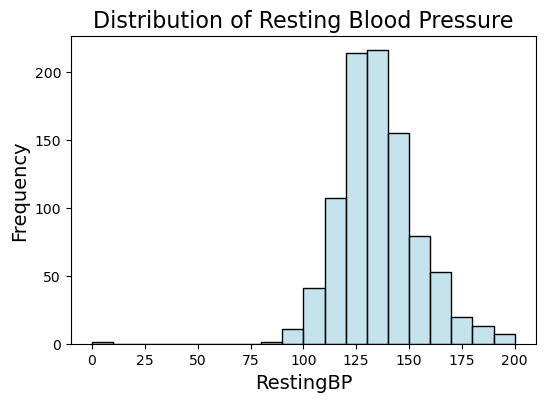

In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(heart_df['RestingBP'], kde=False, color='lightblue', bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Resting Blood Pressure', fontsize=16)
plt.xlabel('RestingBP', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

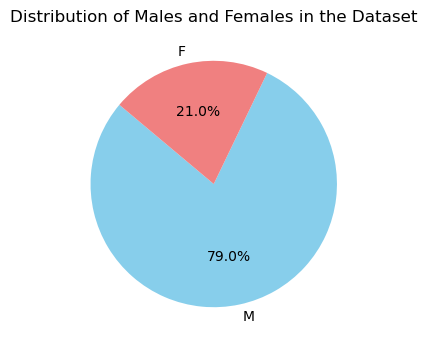

In [64]:
sex_counts = heart_df['Sex'].value_counts()

# Creating pie chart
plt.figure(figsize=(6, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Males and Females in the Dataset')
plt.show()

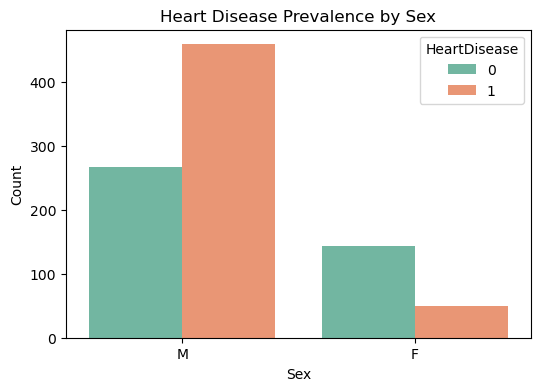

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='HeartDisease', data=heart_df, palette='Set2')
plt.title('Heart Disease Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

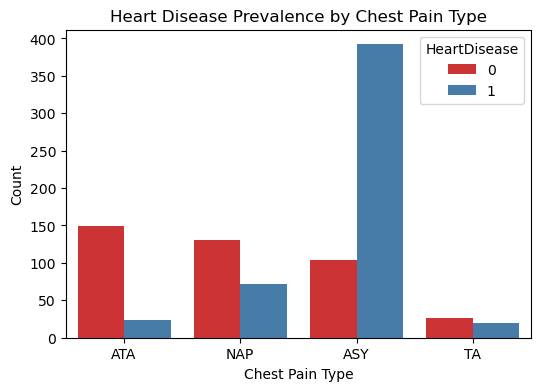

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=heart_df, palette='Set1')
plt.title('Heart Disease Prevalence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


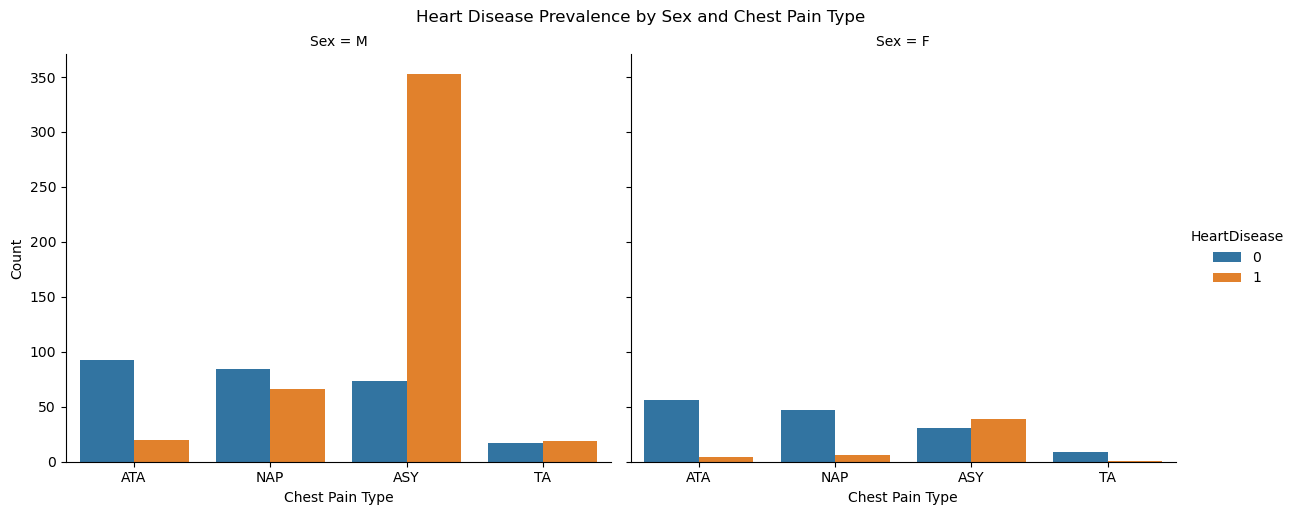

In [41]:
g = sns.catplot(x='ChestPainType', hue='HeartDisease', col='Sex',
                data=heart_df, kind='count', height=5, aspect=1.2)
g.fig.suptitle('Heart Disease Prevalence by Sex and Chest Pain Type', y=1.02)
g.set_axis_labels('Chest Pain Type', 'Count')
plt.show()

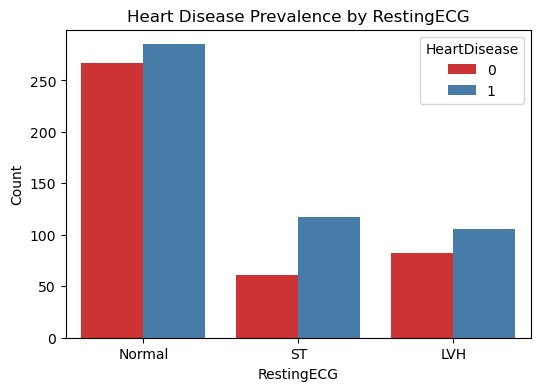

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RestingECG', hue='HeartDisease', data=heart_df, palette='Set1')
plt.title('Heart Disease Prevalence by RestingECG')
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.show()

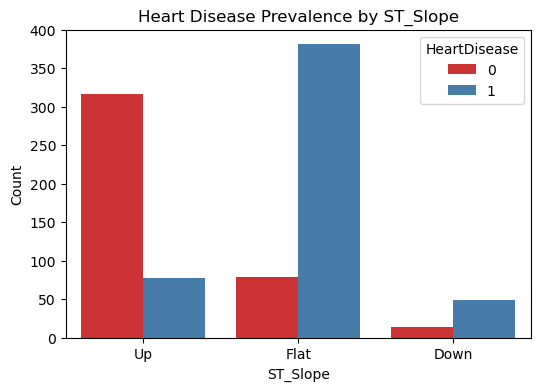

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=heart_df, palette='Set1')
plt.title('Heart Disease Prevalence by ST_Slope')
plt.xlabel('ST_Slope')
plt.ylabel('Count')
plt.show()

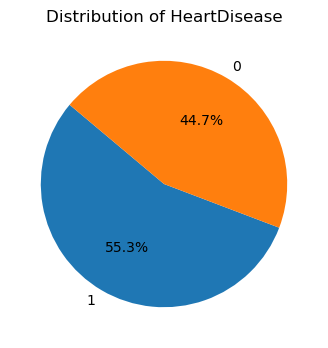

In [67]:
sex_counts = heart_df['HeartDisease'].value_counts()

# Creating pie chart
plt.figure(figsize=(6, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of HeartDisease')
plt.show()

In [68]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Specify the categorical columns
categorical_columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

# Create the ColumnTransformer to one-hot encode the categorical columns
# 'remainder' parameter ensures that non-categorical columns remain unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False), categorical_columns)
    ],
    remainder='passthrough'  # Keeps numerical columns as they are
)

# Apply the transformation
df_encoded = preprocessor.fit_transform(heart_df)

# If you need the encoded data as a DataFrame
encoded_df = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())

# View the resulting DataFrame
print(encoded_df.head())

   cat__Sex_F  cat__Sex_M  cat__ChestPainType_ASY  cat__ChestPainType_ATA  \
0         0.0         1.0                     0.0                     1.0   
1         1.0         0.0                     0.0                     0.0   
2         0.0         1.0                     0.0                     1.0   
3         1.0         0.0                     1.0                     0.0   
4         0.0         1.0                     0.0                     0.0   

   cat__ChestPainType_NAP  cat__ChestPainType_TA  cat__RestingECG_LVH  \
0                     0.0                    0.0                  0.0   
1                     1.0                    0.0                  0.0   
2                     0.0                    0.0                  0.0   
3                     0.0                    0.0                  0.0   
4                     1.0                    0.0                  0.0   

   cat__RestingECG_Normal  cat__RestingECG_ST  cat__ExerciseAngina_N  ...  \
0                    

/Users/anmolahuja/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
from sklearn.preprocessing import LabelEncoder
X = heart_df.drop("HeartDisease", axis = 1)
y = heart_df["HeartDisease"]

cols=  ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
label_encoders = {}

for i in cols:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])
    label_encoders[i] = le

           Feature  Importance
10        ST_Slope    0.241583
9          Oldpeak    0.122604
4      Cholesterol    0.107333
7            MaxHR    0.103918
8   ExerciseAngina    0.100037
2    ChestPainType    0.092719
0              Age    0.085562
3        RestingBP    0.066506
1              Sex    0.033995
6       RestingECG    0.026215
5        FastingBS    0.019527


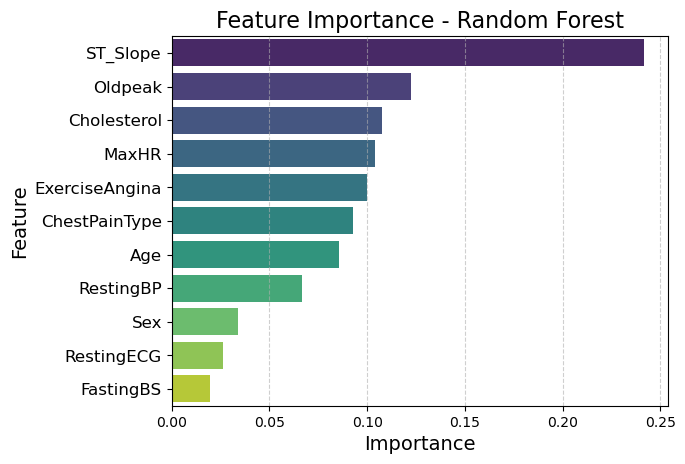

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get the feature importance scores
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importance

sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')

# Add labels and title with larger fonts
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance - Random Forest', fontsize=16)

plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.yticks(fontsize=12)

# Show the plot
plt.show()